In [ ]:
#################################################################
#SP23-BAI-003 Adil Shafique
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the CNN model
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model4.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
history4 = model4.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    verbose=1
)

# Evaluate the model on test data
loss, accuracy = model4.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Visualization of predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Get predictions on a subset of test data
test_images = X_test[:10]
test_labels = np.argmax(y_test[:10], axis=1)
predictions = np.argmax(model.predict(test_images), axis=1)

# Plot the images, true labels, and predicted labels
fig = plt.figure(figsize=(15, 5))
for i in range(10):
    # Plot the image
    plt.subplot(2, 10, i+1)
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[test_labels[i]]}")
    plt.axis('off')

    # Plot the predicted label
    plt.subplot(2, 10, i+11)
    plt.imshow(test_images[i])
    plt.title(f"Pred: {class_names[predictions[i]]}")
    plt.axis('off')

plt.show()


KeyboardInterrupt: 

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Display the shapes of the datasets
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Test data shape: {X_test.shape}, {y_test.shape}")


X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print('After reshpaing: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)


model5 = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3)),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(4, 4)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model5.summary()


model5.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

history5 = model5.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    verbose=1
)

loss, accuracy = model5.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")




Training data shape: (50000, 32, 32, 3), (50000, 1)
Test data shape: (10000, 32, 32, 3), (10000, 1)
After reshpaing:  (50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,612,810 (6.15 MB)

 Trainable params: 1,612,810 (6.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 132s 103ms/step - accuracy: 0.6181 - loss: 1.0834 - val_accuracy: 0.6357 - val_loss: 1.0505
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 124s 89ms/step - accuracy: 0.6268 - loss: 1.0664 - val_accuracy: 0.6321 - val_loss: 1.0461
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 111s 88ms/step - accuracy: 0.6287 - loss: 1.0497 - val_accuracy: 0.6385 - val_loss: 1.0337
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.6365 - loss: 1.0264 - val_accuracy: 0.6463 - val_loss: 1.0163
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 113s 91ms/step - accuracy: 0.6436 - loss: 1.0068 - val_accuracy: 0.6570 - val_loss: 0.9860
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 124s 99ms/step - accuracy: 0.6527 - loss: 1.0039 - val_accuracy: 0.6636 - val_loss: 0.9779
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 119s 95ms/step - accuracy: 0.6524 - loss: 0.9873 - val_accuracy: 0.6621 - val_loss: 0.9764
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 98ms/step - accuracy:

In [ ]:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Display the shapes of the datasets
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Test data shape: {X_test.shape}, {y_test.shape}")


X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print('After reshpaing: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)


# Updated Model Definition
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D(pool_size=(3, 3)),

    # Second Convolutional Layer
    Conv2D(32, (5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3)),

    # Third Convolutional Layer
    Conv2D(32, (5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3)),

    # Flatten Layer
    Flatten(),

    # Dense Layers
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.summary()


model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

history6 = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    verbose=1
)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")




Training data shape: (50000, 32, 32, 3), (50000, 1)
Test data shape: (10000, 32, 32, 3), (10000, 1)
After reshpaing:  (50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,722 (295.79 KB)

 Trainable params: 75,722 (295.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
 548/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.7408 - loss: 0.7555

KeyboardInterrupt: 

In [ ]:
'''#Plot for the fourth model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch (Model 1)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch (Model 1)')
plt.legend()
plt.show()


# Plot for the fifth model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch (Model 2)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history5.history['accuracy'], label='Training Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch (Model 2)')
plt.legend()
plt.show()

# Plot for the sixth model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch (Model 3)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch (Model 3)')
plt.legend()
plt.show()
'''
##########################################################################################

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/20], Loss: 1.8376
Epoch [2/20], Loss: 1.6955
Epoch [3/20], Loss: 1.6444
Epoch [4/20], Loss: 1.6058
Epoch [5/20], Loss: 1.5822
Epoch [6/20], Loss: 1.5594
Epoch [7/20], Loss: 1.5393
Epoch [8/20], Loss: 1.5217
Epoch [9/20], Loss: 1.4995
Epoch [10/20], Loss: 1.4786
Epoch [11/20], Loss: 1.4713
Epoch [12/20], Loss: 1.4557
Epoch [13/20], Loss: 1.4525
Epoch [14/20], Loss: 1.4358
Epoch [15/20], Loss: 1.4230
Epoch [16/20], Loss: 1.4173
Epoch [17/20], Loss: 1.4028
Epoch [18/20], Loss: 1.3885
Epoch [19/20], Loss: 1.3815
Epoch [20/20], Loss: 1.3728
Training Accuracy: 60.03%
Test Accuracy: 51.99%


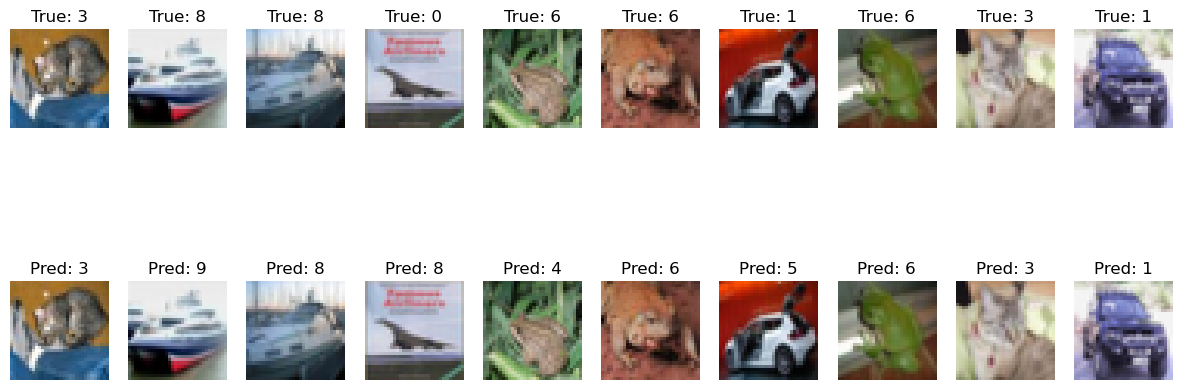

Accuracy: 0.52
Precision: 0.53
Recall: 0.52
F1-Score: 0.52


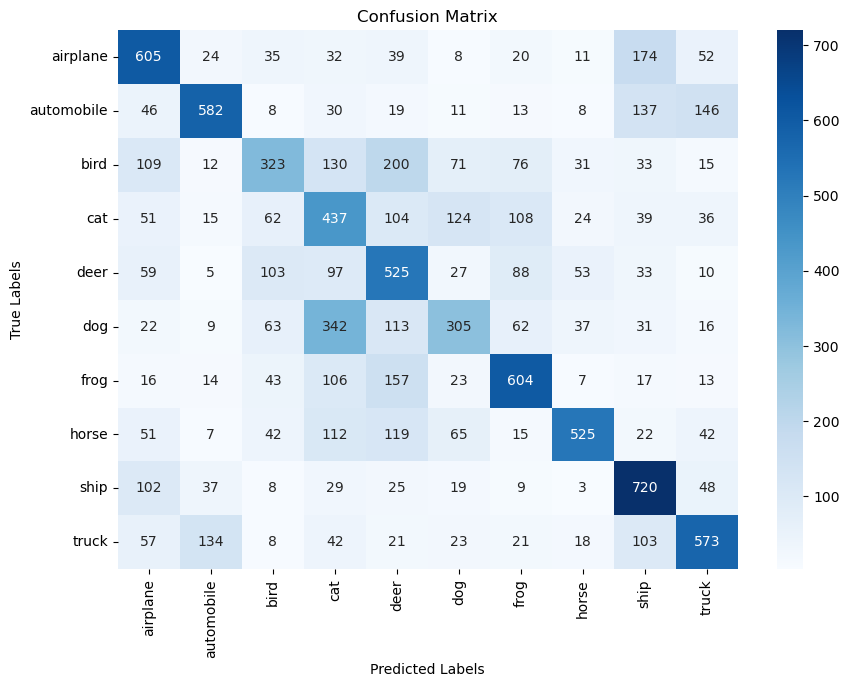

In [16]:
###########################################################################################
##ANN Classification
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load CIFAR-10 Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to range [-1, 1]
])

batch_size = 128  # Reduced batch size for faster processing
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define ANN Model
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.dropout = nn.Dropout(0.5)  # Regularization

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  # Flatten CIFAR-10 images to 3072 (32x32x3)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Hyperparameters
input_size = 32 * 32 * 3  # CIFAR-10 images flattened
hidden_size1 = 512
hidden_size2 = 256
output_size = 10  # 10 classes in CIFAR-10
learning_rate = 0.001
epochs = 20  # Reduced epochs for faster execution

# Model, Loss, and Optimizer
model = ANN(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop
def train_model(model, train_loader, criterion, optimizer, epochs):
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

# Train the model
train_model(model, train_loader, criterion, optimizer, epochs)

# Evaluate Accuracy
def calculate_accuracy(model, data_loader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

train_accuracy = calculate_accuracy(model, train_loader)
test_accuracy = calculate_accuracy(model, test_loader)

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Visualize Predictions
data_iter = iter(test_loader)
images, labels = next(data_iter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

fig = plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(images[i].permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Denormalize and permute dimensions
    plt.title(f"True: {labels[i]}")
    plt.axis('off')
    
    plt.subplot(2, 10, i+11)
    plt.imshow(images[i].permute(1, 2, 0).numpy() * 0.5 + 0.5)
    plt.title(f"Pred: {predicted[i]}")
    plt.axis('off')

plt.show()


from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import seaborn as sns

# Evaluate the model and calculate metrics
def evaluate_model(model, data_loader):
    all_labels = []
    all_predictions = []
    model.eval()
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predicted.numpy())
    
    # Convert lists to NumPy arrays
    all_labels = np.array(all_labels)
    all_predictions = np.array(all_predictions)
    
    # Calculate metrics
    acc = accuracy_score(all_labels, all_predictions)
    cm = confusion_matrix(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    
    return acc, cm, precision, recall, f1

# Evaluate on test data
accuracy, conf_matrix, precision, recall, f1 = evaluate_model(model, test_loader)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Display confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


